# Walmart Sales from 2010-2012 across 45 Stores

 This dataset contains information about the weekly sales of 45 walmart stores from 2010-2012. The dataset information about the Holidays, Temperature, Fuel Price, CPI, and Unemployment that occurred during that week that affect the sales. The dataset includes the following columns:


1.   Store number - a number (1-45) that indicates which store that data was recorded from
2. Date -The Week of Sales. It is in the format of dd-mm-yyyy. The date starts from 05-02-2010
3. Weekly sales - The sales of the given store in the given week
4. Holiday - If the week has a special Holiday or not. 1-The week has a Holiday 0-Fully working week
5. Temperature - Average Temperature of the week of sales
6. Fuel price - Price of the Fuel in the region of the given store
7. CPI - Consumer Price Index
8. Unemployment - Unemployment of the given store region
Source: https://www.kaggle.com/datasets/varsharam/walmart-sales-dataset-of-45stores


# Load Dataset and Format




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

df = pd.read_csv('walmart-sales-dataset-of-45stores.csv')

#Reformat data for date time
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week_Number'] = df['Date'].dt.isocalendar().week
print(df.head())


# Check the structure of the dataset
print(df.info())

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Month  Year  Week_Number  
0  211.096358         8.106      2  2010            5  
1  211.242170         8.106      2  2010            6  
2  211.289143         8.106      2  2010            7  
3  211.319643         8.106      2  2010            8  
4  211.350143         8.106      3  2010            9  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         


In [ ]:
# Calculate summary statistics for numerical variables
print(df)
numerical_variables = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
numerical_summary = df[numerical_variables].describe()
print("Summary Statistics for Numerical Variables:")
print(numerical_summary)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Month  Year  Week_N


# Seasonal Trends in Weekly Sales
Now we analyze how different seasons impact weekly sales. This is done by first extracting the month and year column and showcasing weekly sales during each month.

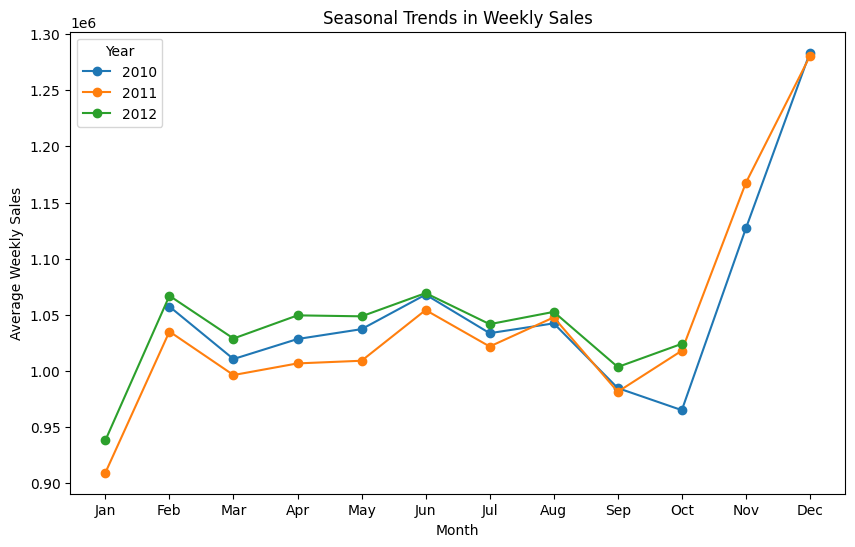

In [ ]:
# Calculate average weekly sales by month
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()

# Plotting the average weekly sales by month
plt.figure(figsize=(10, 6))
for year in monthly_sales['Year'].unique():
    year_data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(year_data['Month'], year_data['Weekly_Sales'], marker='o', label=str(year))

plt.title("Seasonal Trends in Weekly Sales")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.show()


This graph plots the weekly sales across the year, allowing us to see trends based on the seasons. It's evident that weekly sales increased during the last few months of the year, likely due to the relatively high frequency of holidays during this time.

To analyze even further, we calculate the average weekly sales by week. From there we can plot the average weekly sales based on week of the year.


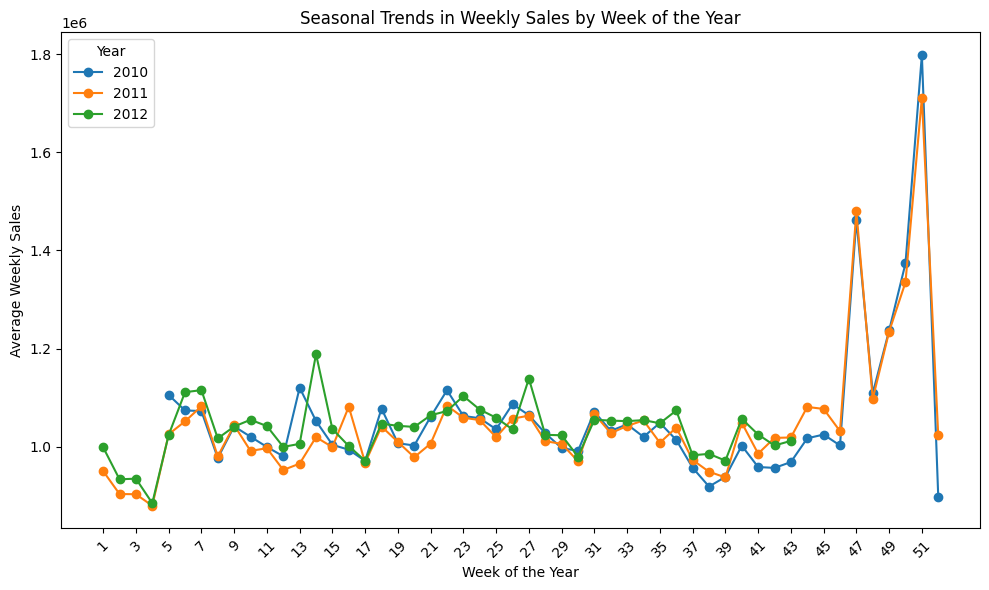

In [ ]:
# Calculate average weekly sales by week of the year
weekly_sales = df.groupby(['Year', 'Week_Number'])['Weekly_Sales'].mean().reset_index()

# Plotting the average weekly sales by week of the year
plt.figure(figsize=(10, 6))
for year in weekly_sales['Year'].unique():
    year_data = weekly_sales[weekly_sales['Year'] == year]
    plt.plot(year_data['Week_Number'], year_data['Weekly_Sales'], marker='o', label=str(year))
plt.title("Seasonal Trends in Weekly Sales by Week of the Year")
plt.xlabel("Week of the Year")
plt.ylabel("Average Weekly Sales")
plt.xticks(ticks=range(1, 53, 2), rotation=45)
plt.legend(title="Year")
plt.tight_layout()
plt.show()

**Analysis**
If we compare the two graphs, Month vs. Weekly Sales and Week vs. Weekly Sales, we can see a common pattern-- namely speaking, both graphs show a stark increase during the last few months/weeks of the year. This is an indication that during the winter there's an increase in sales.

We can do a deeper dive by creating a new column for seasons. After categorizing the months, we can do another analysis on seasons.

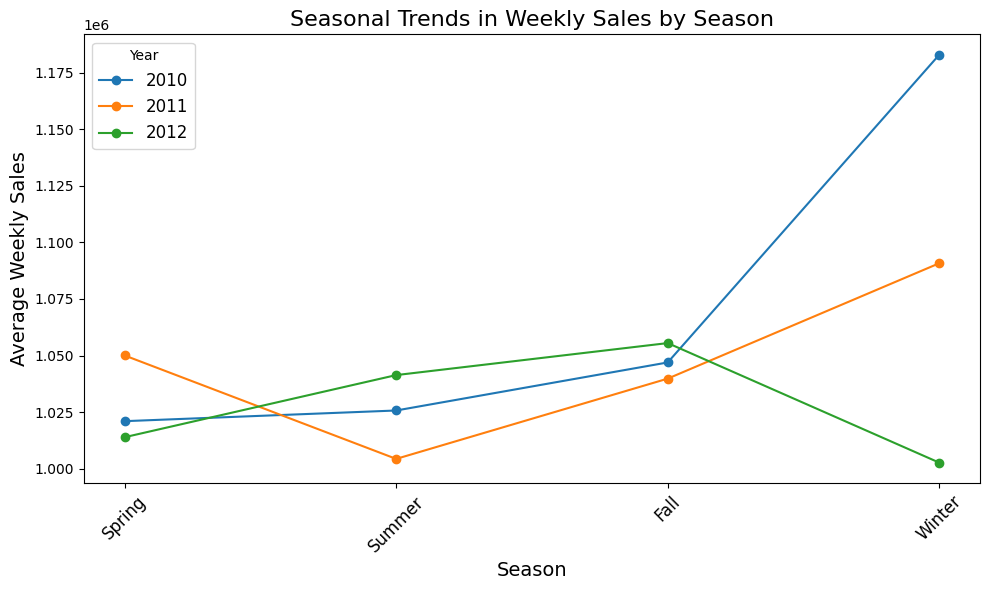

In [ ]:
# Create a 'Season' column based on the month
conditions = [
    (df['Date'].dt.month >= 3) & (df['Date'].dt.month <= 5),
    (df['Date'].dt.month >= 6) & (df['Date'].dt.month <= 8),
    (df['Date'].dt.month >= 9) & (df['Date'].dt.month <= 11),
    (df['Date'].dt.month == 12) | (df['Date'].dt.month <= 2)
]
values = ['Spring', 'Summer', 'Fall', 'Winter']
df['Season'] = np.select(conditions, values)

# Calculate average weekly sales by season
seasonal_sales = df.groupby(['Year', 'Season'])['Weekly_Sales'].mean().reset_index()

# Plotting the average weekly sales by season
plt.figure(figsize=(10, 6))
for year in seasonal_sales['Year'].unique():
    year_data = seasonal_sales[seasonal_sales['Year'] == year]
    plt.plot(year_data['Season'], year_data['Weekly_Sales'], marker='o', label=str(year))
plt.title("Seasonal Trends in Weekly Sales by Season", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Average Weekly Sales", fontsize=14)
plt.xticks(ticks=range(4), labels=['Spring', 'Summer', 'Fall', 'Winter'], fontsize=12, rotation=45)
plt.legend(title="Year", fontsize=12)
plt.tight_layout()
plt.show()

**Analysis**

We observe the same trends as the previous two graphs, highlighting that sales generally increase during the winter. It's important to note that there are differences in sales based on the year. It appears that 2010 had very high sales in the winter but in 2012 there was a sharp decrease after the fall.

# Seasonal Analysis based on Holidays and Temperatures


Distribution of Holiday Flags:
Holiday_Flag
0    0.93007
1    0.06993
Name: proportion, dtype: float64


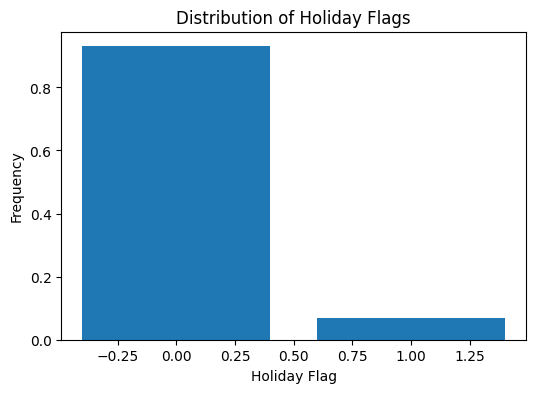

In [ ]:
# Explore the distribution of Holiday Flags
categorical_distribution = df['Holiday_Flag'].value_counts(normalize=True)
print("\nDistribution of Holiday Flags:")
print(categorical_distribution)

# Create a bar plot for the distribution of holiday flags
plt.figure(figsize=(6, 4))
plt.bar(categorical_distribution.index, categorical_distribution.values)
plt.title("Distribution of Holiday Flags")
plt.xlabel("Holiday Flag")
plt.ylabel("Frequency")
plt.show()


This bar graph showcases the distribution of holidays throughout the dataset -- showcasing that most data points represent non-holiday days.

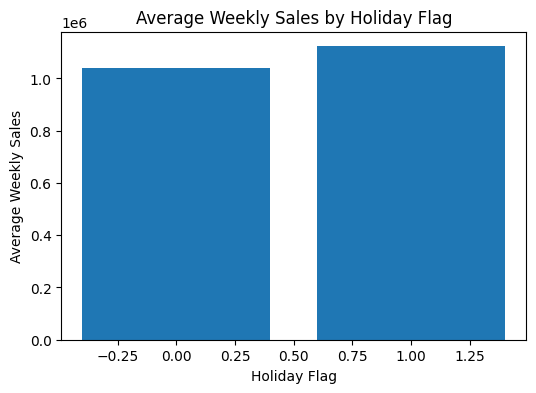

In [ ]:
# Seasonal analysis based on holidays and temperatures
# Average weekly sales by holiday and non-holiday weeks
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

plt.figure(figsize=(6, 4))
plt.bar(holiday_sales.index, holiday_sales.values)
plt.title("Average Weekly Sales by Holiday Flag")
plt.xlabel("Holiday Flag")
plt.ylabel("Average Weekly Sales")
plt.show()


This graph showcases the differences in average weekly sales based on whether there were more sales during a holiday week vs. non-holiday week. It can be concluded that sales increased when the week included holidays.

Now let's look into the specific holidays and how they affect the weekly sales.

### How do holidays affect weekly sales?

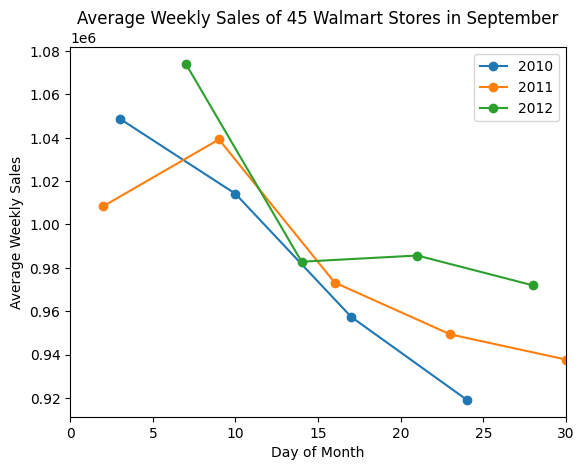

Average weekly sales on weeks without Labour Day: 989335.3491623931
Average weekly sales on Labour Day Week: 1026640.2818888889
Percent change: 3.7707065413238774%


In [ ]:
# September Graph (Labor Day)
# Plotting Graph
df['Date'] = df['Date'].astype(str)

# September Graph (Labor Day)
# Plotting Graph
sept2010 = df[df['Date'].str.contains('2010-09')]
sept2011 = df[df['Date'].str.contains('2011-09')]
sept2012 = df[df['Date'].str.contains('2012-09')]

sept_sales_2010 = sept2010.groupby('Date')['Weekly_Sales'].mean()
sept_sales_2010.index = sept_sales_2010.index.map(lambda x:int(x.split('-')[2]))

sept_sales_2011 = sept2011.groupby('Date')['Weekly_Sales'].mean()
sept_sales_2011.index = sept_sales_2011.index.map(lambda x:int(x.split('-')[2]))

sept_sales_2012 = sept2012.groupby('Date')['Weekly_Sales'].mean()
sept_sales_2012.index = sept_sales_2012.index.map(lambda x:int(x.split('-')[2]))

plt.plot(sept_sales_2010.index, sept_sales_2010, label='2010', marker='o')
plt.plot(sept_sales_2011.index, sept_sales_2011, label='2011', marker='o')
plt.plot(sept_sales_2012.index, sept_sales_2012, label='2012', marker='o')
plt.xlabel('Day of Month')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales of 45 Walmart Stores in September')
plt.legend()
plt.xlim(1, 30)
ax = plt.gca()
xticks = ax.get_xticks()
plt.xticks(ticks=xticks, labels=['{}'.format(int(tick)) for tick in xticks])
plt.show()

sept = df[(df['Date'].str.contains('2010-09')) | (df['Date'].str.contains('2011-09'))| (df['Date'].str.contains('2012-09'))]
sept_filtered = sept[(sept['Date']!='2010-09-10') | (sept['Date']!='2011-09-09')| (sept['Date']!='2012-07-09')]
sept_filtered = sept_filtered.groupby('Date')['Weekly_Sales'].mean()
nonholiday_sales_sept = sept_filtered.mean()
print("Average weekly sales on weeks without Labour Day: " + str(nonholiday_sales_sept))
sept_holiday = sept[(sept['Date']=='2010-09-10') | (sept['Date']=='2011-09-09')| (sept['Date']=='2012-07-09')]
sept_holiday = sept_holiday.groupby('Date')['Weekly_Sales'].mean()
holiday_sales_sept = sept_holiday.mean()
print("Average weekly sales on Labour Day Week: "+ str(holiday_sales_sept))
print("Percent change: " + str(((holiday_sales_sept-nonholiday_sales_sept)/nonholiday_sales_sept)* 100) +"%")

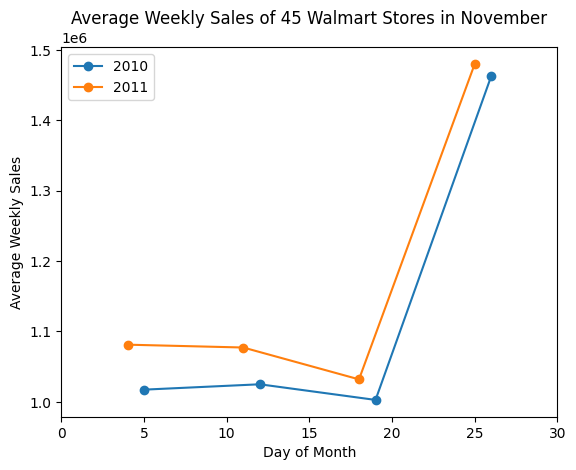

Average weekly sales on weeks without Thanksgiving: 1039263.3944814815
Average weekly sales on Thanksgiving Week: 1471273.427777778
Percent change: 41.568868449546294%


In [ ]:
# November Graph (Thanksgiving)
# Plotting Graph
nov2010 = df[df['Date'].str.contains('2010-11')]
nov2011 = df[df['Date'].str.contains('2011-11')]

nov_sales_2010 = nov2010.groupby('Date')['Weekly_Sales'].mean()
nov_sales_2010.index = nov_sales_2010.index.map(lambda x:int(x.split('-')[2]))

nov_sales_2011 = nov2011.groupby('Date')['Weekly_Sales'].mean()
nov_sales_2011.index = nov_sales_2011.index.map(lambda x:int(x.split('-')[2]))

plt.plot(nov_sales_2010.index, nov_sales_2010, label='2010', marker='o')
plt.plot(nov_sales_2011.index, nov_sales_2011, label='2011', marker='o')
plt.xlabel('Day of Month')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales of 45 Walmart Stores in November')
plt.legend()
plt.xlim(1, 30)
ax = plt.gca()
xticks = ax.get_xticks()
plt.xticks(ticks=xticks, labels=['{}'.format(int(tick)) for tick in xticks])
plt.show()

nov = df[(df['Date'].str.contains('2010-11')) | (df['Date'].str.contains('2011-11'))]
nov_filtered = nov[(nov['Date']!='2010-11-26') & (nov['Date']!='2011-11-25')]
nov_filtered = nov_filtered.groupby('Date')['Weekly_Sales'].mean()
nonholiday_sales_nov = nov_filtered.mean()
print("Average weekly sales on weeks without Thanksgiving: " + str(nonholiday_sales_nov))

nov_holiday = nov[(nov['Date']=='2010-11-26') | (nov['Date']=='2011-11-25')]
nov_holiday = nov_holiday.groupby('Date')['Weekly_Sales'].mean()
holiday_sales_nov = nov_holiday.mean()
print("Average weekly sales on Thanksgiving Week: "+ str(holiday_sales_nov))
print("Percent change: " + str(((holiday_sales_nov-nonholiday_sales_nov)/nonholiday_sales_nov)* 100) +"%")


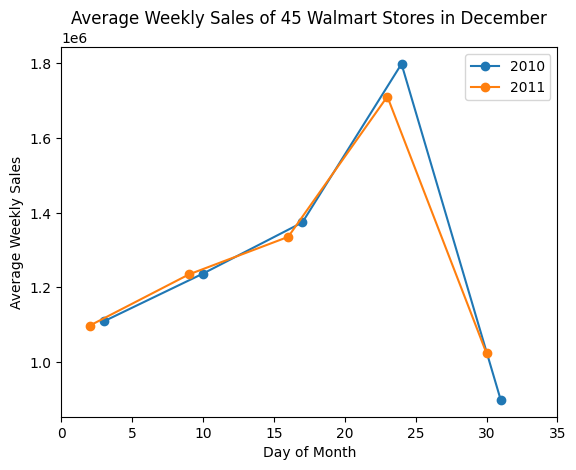

Average weekly sales on weeks without Christmas: 1163636.0508055554
Average weekly sales on Christmas Week: 1754773.9656666666
Percent change: 50.80092821564626%


In [ ]:
# December Graph ("Christmas")
# Plotting Graph
dec2010 = df[df['Date'].str.contains('2010-12')]
dec2011 = df[df['Date'].str.contains('2011-12')]

dec_sales_2010 = dec2010.groupby('Date')['Weekly_Sales'].mean()
dec_sales_2010.index = dec_sales_2010.index.map(lambda x:int(x.split('-')[2]))

dec_sales_2011 = dec2011.groupby('Date')['Weekly_Sales'].mean()
dec_sales_2011.index = dec_sales_2011.index.map(lambda x:int(x.split('-')[2]))

plt.plot(dec_sales_2010.index, dec_sales_2010, label='2010', marker='o')
plt.plot(dec_sales_2011.index, dec_sales_2011, label='2011', marker='o')
plt.xlabel('Day of Month')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales of 45 Walmart Stores in December')
plt.legend()
plt.xlim(1, 31)
ax = plt.gca()
xticks = ax.get_xticks()
plt.xticks(ticks=xticks, labels=['{}'.format(int(tick)) for tick in xticks])
plt.show()

# Calculating Percent Change
dec = df[(df['Date'].str.contains('2010-12')) | (df['Date'].str.contains('2011-12'))]
dec_filtered = dec[(dec['Date']!='2010-12-24') & (dec['Date']!='2011-12-23')]
dec_filtered = dec_filtered.groupby('Date')['Weekly_Sales'].mean()
nonholiday_sales_dec = dec_filtered.mean()
print("Average weekly sales on weeks without Christmas: " + str(nonholiday_sales_dec))

dec_holiday = dec[(dec['Date']=='2010-12-24') | (dec['Date']=='2011-12-23')]
dec_holiday = dec_holiday.groupby('Date')['Weekly_Sales'].mean()
holiday_sales_dec = dec_holiday.mean()
print("Average weekly sales on Christmas Week: "+ str(holiday_sales_dec))
print("Percent change: " + str(((holiday_sales_dec-nonholiday_sales_dec)/nonholiday_sales_dec)* 100) +"%")


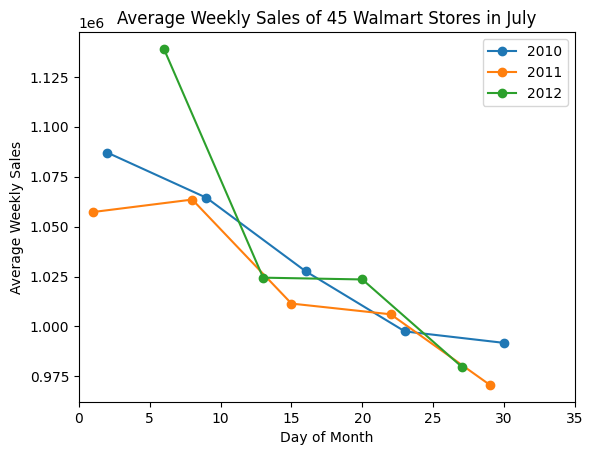

Average weekly sales on weeks without Labour Day: 1014650.4068080809
Average weekly sales on Labour Day Week: 1113005.6264444445
Percent change: 9.693508126190244%


In [ ]:
# July Graph (4th of July)
df['Date'] = df['Date'].astype(str)
july2010 = df[df['Date'].str.contains('2010-07')]
july2011 = df[df['Date'].str.contains('2011-07')]
july2012 = df[df['Date'].str.contains('2012-07')]

july_sales_2010 = july2010.groupby('Date')['Weekly_Sales'].mean()
july_sales_2010.index = july_sales_2010.index.map(lambda x:int(x.split('-')[2]))

july_sales_2011 = july2011.groupby('Date')['Weekly_Sales'].mean()
july_sales_2011.index = july_sales_2011.index.map(lambda x:int(x.split('-')[2]))

july_sales_2012 = july2012.groupby('Date')['Weekly_Sales'].mean()
july_sales_2012.index = july_sales_2012.index.map(lambda x:int(x.split('-')[2]))

plt.plot(july_sales_2010.index, july_sales_2010, label='2010', marker='o')
plt.plot(july_sales_2011.index, july_sales_2011, label='2011', marker='o')
plt.plot(july_sales_2012.index, july_sales_2012, label='2012', marker='o')
plt.xlabel('Day of Month')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales of 45 Walmart Stores in July')
plt.legend()
plt.xlim(1, 31)
ax = plt.gca()
xticks = ax.get_xticks()
plt.xticks(ticks=xticks, labels=['{}'.format(int(tick)) for tick in xticks])
plt.show()

# Calculating Percent Change
july = df[(df['Date'].str.contains('2010-07')) | (df['Date'].str.contains('2011-07'))| (df['Date'].str.contains('2012-07'))]
july_filtered = july[(july['Date']!='2010-07-02') & (july['Date']!='2011-07-01')& (july['Date']!='2012-07-06')]
july_filtered = july_filtered.groupby('Date')['Weekly_Sales'].mean()
nonholiday_sales_july = july_filtered.mean()
print("Average weekly sales on weeks without Labour Day: " + str(nonholiday_sales_july))

july_holiday = july[(july['Date']=='2010-07-02') | (july['Date']=='01-07-2011')| (july['Date']=='2012-07-06')]
july_holiday = july_holiday.groupby('Date')['Weekly_Sales'].mean()
holiday_sales_july = july_holiday.mean()
print("Average weekly sales on Labour Day Week: "+ str(holiday_sales_july))
print("Percent change: " + str(((holiday_sales_july-nonholiday_sales_july)/nonholiday_sales_july)* 100) +"%")

# Unemployment Trends
This section outlines how unemployment rates affect weekly sales based on years and store.

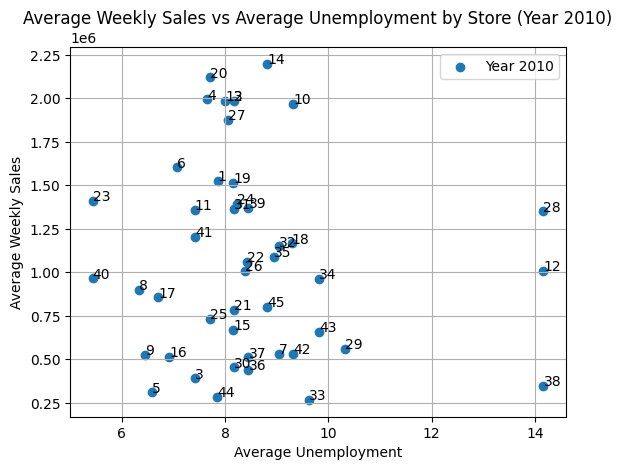

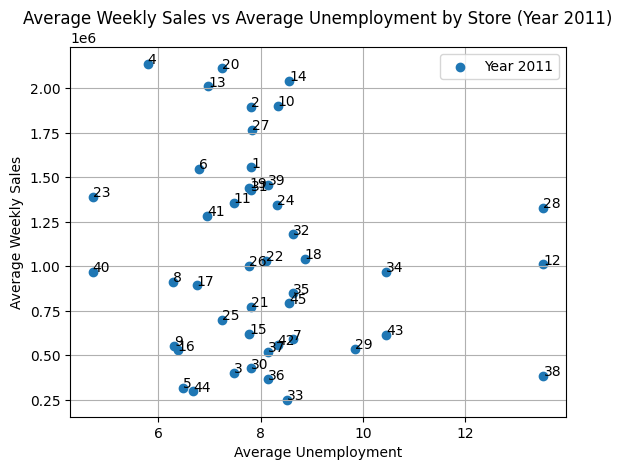

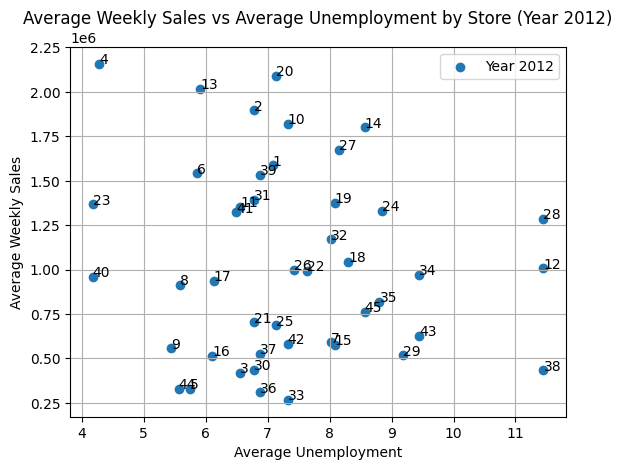

In [ ]:
grouped = df.groupby(['Year', 'Store'])
averages = grouped[['Unemployment', 'Weekly_Sales']].mean().reset_index()

for year in averages['Year'].unique():
    year_data = averages[averages['Year'] == year]
    plt.scatter(year_data['Unemployment'], year_data['Weekly_Sales'], label=f'Year {year}')
    for i in range(len(year_data)):
        plt.annotate(year_data['Store'].iloc[i], (year_data['Unemployment'].iloc[i], year_data['Weekly_Sales'].iloc[i]))
    plt.xlabel('Average Unemployment')
    plt.ylabel('Average Weekly Sales')
    plt.title(f'Average Weekly Sales vs Average Unemployment by Store (Year {year})')
    plt.legend()
    plt.grid(True)
    plt.show()

These graphs plot each point, representing a store, and x and y coordinates which correspond to the average unemployment rate and average weekly sales for that store, respectively. We see common similarities in stores each year as well as their corresponding weekly sales and unemployement.

Unemployment vs weekly sales

---



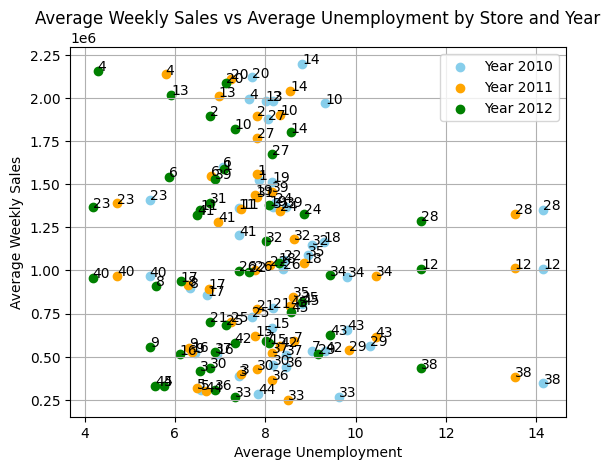

In [ ]:


color_map = {2010: 'skyblue', 2011: 'orange', 2012: 'green'}

for year in averages['Year'].unique():
    year_data = averages[averages['Year'] == year]
    plt.scatter(year_data['Unemployment'], year_data['Weekly_Sales'], label=f'Year {year}', color=color_map[year])
    for i in range(len(year_data)):
        plt.annotate(year_data['Store'].iloc[i], (year_data['Unemployment'].iloc[i], year_data['Weekly_Sales'].iloc[i]))

plt.xlabel('Average Unemployment')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales vs Average Unemployment by Store and Year')
plt.legend()
plt.grid(True)
plt.show()

The graph above displays the average unemployment plotted against the weekly average sales. The colors represent different years, while the numbers denote the store number. Surprisingly, the graph suggests that unemployment in a region is generally not a reliable metric for predicting sales at a store. Contrary to expectations, an increase in unemployment does not consistently lead to a decrease in sales. For instance, stores 28, 12, and 38 show a decrease in unemployment each year, yet there are no noticeable changes in average weekly sales. This observation challenges the common assumption that higher unemployment necessarily results in reduced sales.

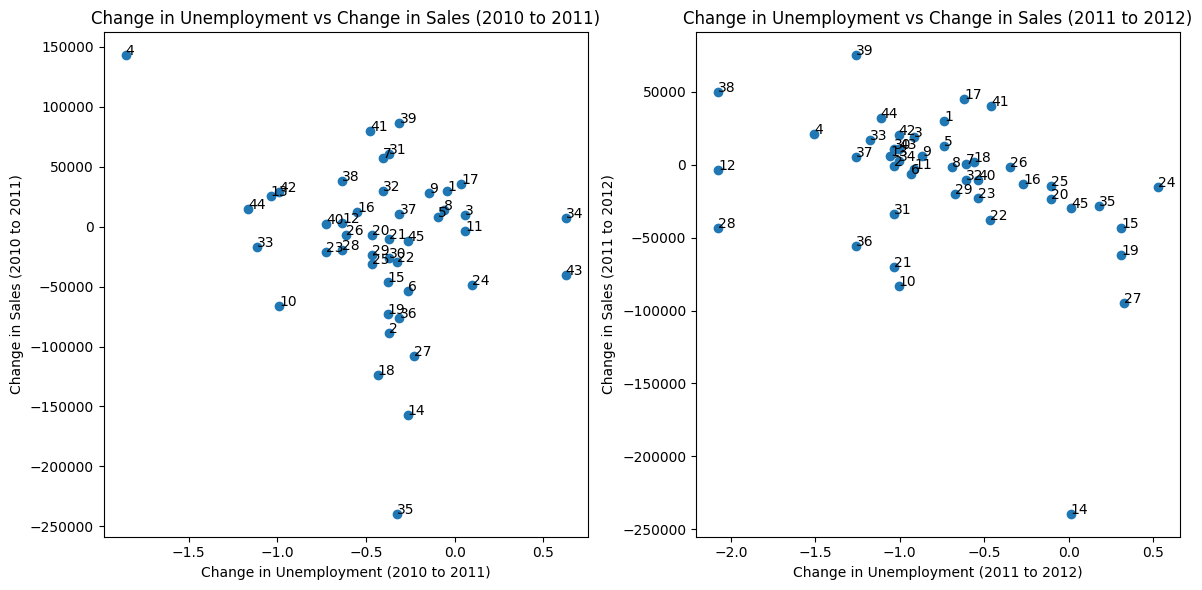

In [ ]:


data_2010 = averages[averages['Year'] == 2010]
data_2011 = averages[averages['Year'] == 2011]
data_2012 = averages[averages['Year'] == 2012]

merge_2010_2011 = pd.merge(data_2010, data_2011, on='Store', suffixes=('_2010', '_2011'))

merge_2011_2012 = pd.merge(data_2011, data_2012, on='Store', suffixes=('_2011', '_2012'))

merge_2010_2011['Unemployment_Change'] = merge_2010_2011['Unemployment_2011'] - merge_2010_2011['Unemployment_2010']
merge_2010_2011['Sales_Change'] = merge_2010_2011['Weekly_Sales_2011'] - merge_2010_2011['Weekly_Sales_2010']

merge_2011_2012['Unemployment_Change'] = merge_2011_2012['Unemployment_2012'] - merge_2011_2012['Unemployment_2011']
merge_2011_2012['Sales_Change'] = merge_2011_2012['Weekly_Sales_2012'] - merge_2011_2012['Weekly_Sales_2011']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(merge_2010_2011['Unemployment_Change'], merge_2010_2011['Sales_Change'])
for i, store in enumerate(merge_2010_2011['Store']):
    plt.annotate(store, (merge_2010_2011['Unemployment_Change'].iloc[i], merge_2010_2011['Sales_Change'].iloc[i]))
plt.xlabel('Change in Unemployment (2010 to 2011)')
plt.ylabel('Change in Sales (2010 to 2011)')
plt.title('Change in Unemployment vs Change in Sales (2010 to 2011)')

plt.subplot(1, 2, 2)
plt.scatter(merge_2011_2012['Unemployment_Change'], merge_2011_2012['Sales_Change'])
for i, store in enumerate(merge_2011_2012['Store']):
    plt.annotate(store, (merge_2011_2012['Unemployment_Change'].iloc[i], merge_2011_2012['Sales_Change'].iloc[i]))
plt.xlabel('Change in Unemployment (2011 to 2012)')
plt.ylabel('Change in Sales (2011 to 2012)')
plt.title('Change in Unemployment vs Change in Sales (2011 to 2012)')

plt.tight_layout()
plt.show()

This graph illustrates the changes in average unemployment and sales from year to year. From the graph, it's evident that the majority of points cluster around the 0 point on the average change in sales (y-axis) at varying changes in unemployment. This further emphasizes that changes in unemployment in the region do not consistently correlate with significant changes in average weekly sales. However, there are outliers, which could be attributed to special circumstances in specific areas at certain times.

Average Unemployment by Season:
    Year  Season  Unemployment
0   2010    Fall      8.460916
1   2010  Spring      8.535126
2   2010  Summer      8.449850
3   2010  Winter      8.539299
4   2011    Fall      7.917017
5   2011  Spring      8.193538
6   2011  Summer      8.113687
7   2011  Winter      8.103901
8   2012    Fall      7.095522
9   2012  Spring      7.453687
10  2012  Summer      7.302405
11  2012  Winter      7.508333


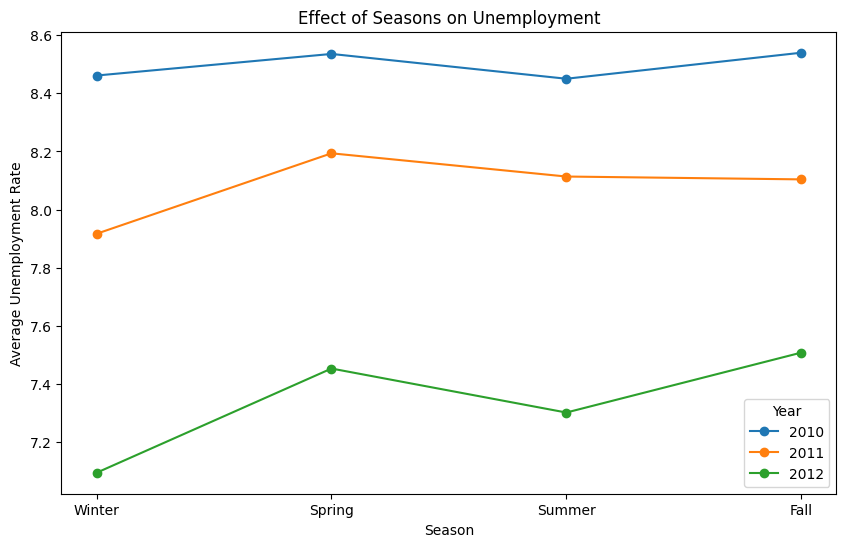

In [ ]:
# Analysis for the effect of seasons on unemployment
seasonal_unemployment = df.groupby(['Year', 'Season'])['Unemployment'].mean().reset_index()
print("Average Unemployment by Season:")
print(seasonal_unemployment)

# Plot the effect of seasons on unemployment
plt.figure(figsize=(10, 6))
for year in seasonal_unemployment['Year'].unique():
    year_data = seasonal_unemployment[seasonal_unemployment['Year'] == year]
    plt.plot(year_data['Season'], year_data['Unemployment'], marker='o', label=str(year))

plt.xlabel('Season')
plt.ylabel('Average Unemployment Rate')
plt.title('Effect of Seasons on Unemployment')
plt.xticks(ticks=range(4), labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.legend(title='Year')
plt.show()

From this graph, it is evident that there's common dips and rises in unemployment based on the season, across all years.

Average Unemployment by Holiday:
   Year  Holiday  Unemployment
0  2010    False      8.497999
1  2010     True      8.447262
2  2011    False      8.092871
3  2011     True      7.980182
4  2012    False      7.356261
5  2012     True      7.237333


<ipython-input-16-9036ba42b5f4>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(years))  # Use a colormap with at least as many colors as the number of years


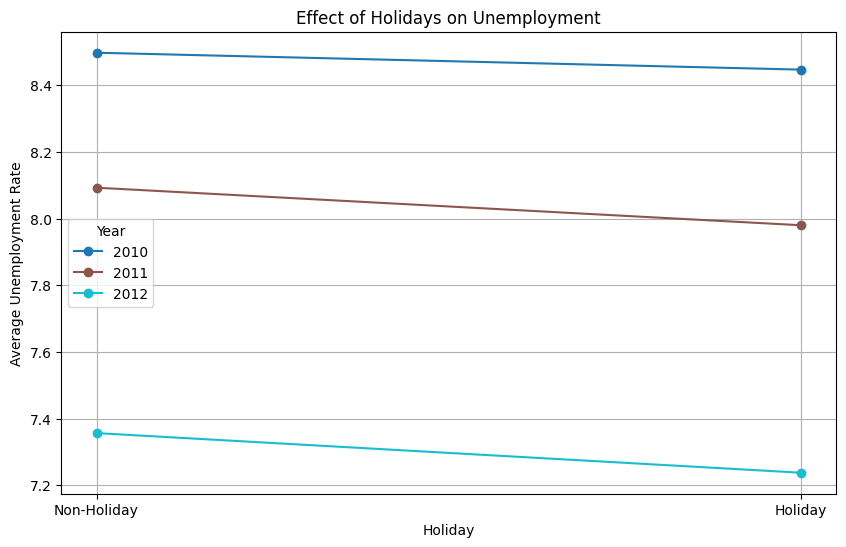

In [ ]:
# Create a 'Holiday' column based on the 'Date' column
holidays = ['2010-07-02', '2010-07-09', '2010-09-10', '2010-11-26', '2010-12-24',
            '2011-07-01', '2011-07-08', '2011-09-09', '2011-11-25', '2011-12-23',
            '2012-07-06', '2012-07-13', '2012-09-07', '2012-11-23', '2012-12-21']
df['Holiday'] = df['Date'].isin(holidays)

# Analysis for the effect of holidays on unemployment
holiday_unemployment = df.groupby(['Year', 'Holiday'])['Unemployment'].mean().reset_index()
print("Average Unemployment by Holiday:")
print(holiday_unemployment)

# Plot the effect of holidays on unemployment
plt.figure(figsize=(10, 6))
years = holiday_unemployment['Year'].unique()
colors = plt.cm.get_cmap('tab10', len(years))  # Use a colormap with at least as many colors as the number of years

for i, year in enumerate(years):
    year_data = holiday_unemployment[holiday_unemployment['Year'] == year]
    plt.plot(year_data['Holiday'], year_data['Unemployment'], marker='o', color=colors(i), label=str(year))

plt.xlabel('Holiday')
plt.ylabel('Average Unemployment Rate')
plt.title('Effect of Holidays on Unemployment')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

This graph highlights the general decrease in the unemployment rate during holidays.

# Temperature Trends

Total Weekly Sales vs. Temp

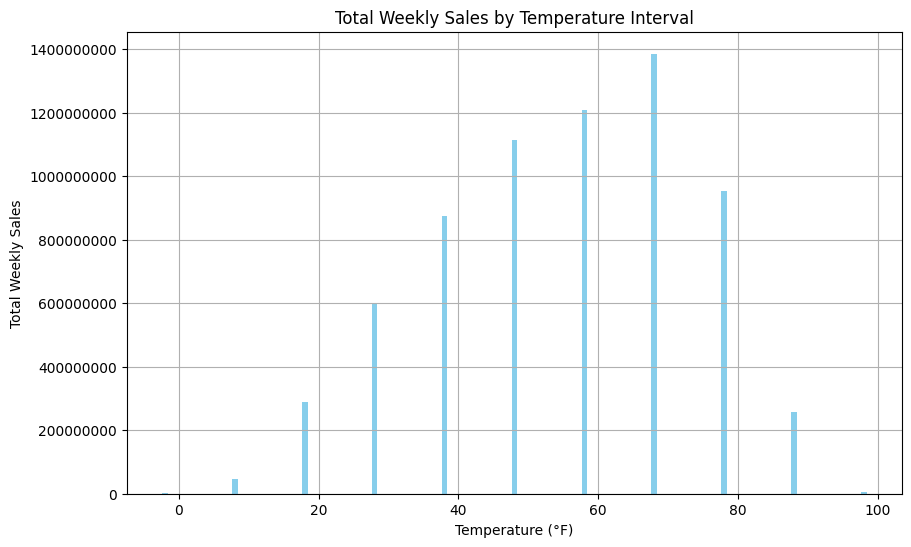

In [ ]:
#Temperature vs. Weekly Sales bar graph
tempIntervals = list(range(int(df['Temperature'].min()), int(df['Temperature'].max()), 10))
averageSales = []
for i in tempIntervals:
    avgSale = df[(df['Temperature'] >= i) & (df['Temperature'] < i + 10)]['Weekly_Sales'].sum()
    averageSales.append(avgSale)
plt.figure(figsize=(10, 6))
plt.bar(tempIntervals, averageSales, align='center', color='skyblue')
plt.title('Total Weekly Sales by Temperature Interval')
plt.xlabel('Temperature (°F)')
plt.ylabel('Total Weekly Sales')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

From this plot, we notice that as the temperature increases, the weekly sales also increase. However, there's a peak in sales when the temperature averages 70 degrees. After that, sales start to decrease.

Average Fuel Price vs. Temp

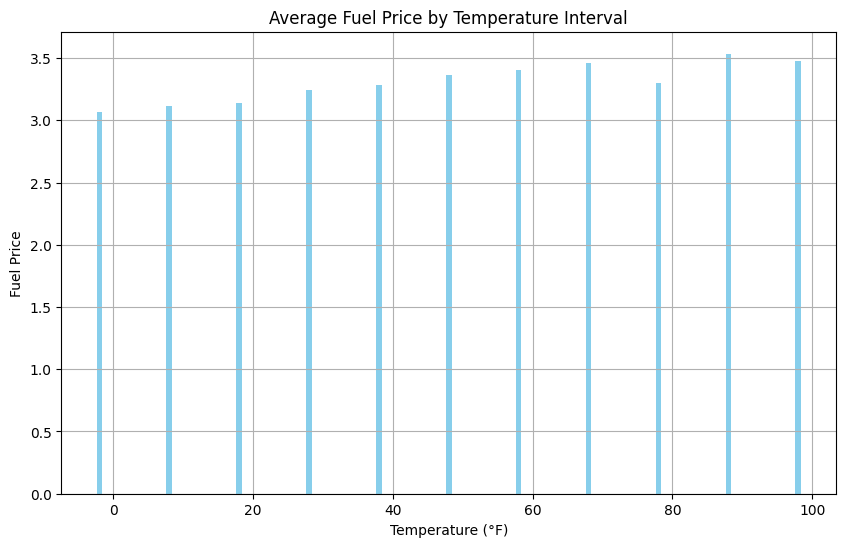

In [ ]:
avgFuelPrice = []
df1 = df.copy()
for i in tempIntervals:
    FuelPrice = df1[(df1['Temperature'] >= i) & (df1['Temperature'] < i + 10)]['Fuel_Price'].mean()
    avgFuelPrice.append(FuelPrice)
plt.figure(figsize=(10, 6))
plt.bar(tempIntervals, avgFuelPrice, align='center', color='skyblue')
plt.title('Average Fuel Price by Temperature Interval')
plt.xlabel('Temperature (°F)')
plt.ylabel('Fuel Price')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

From the graph, we don't see much correlation with the fuel price and temperature, however a slight increase in fuel price does seem apparent as temperature increases.

Average Unemployment Rate vs. Temp

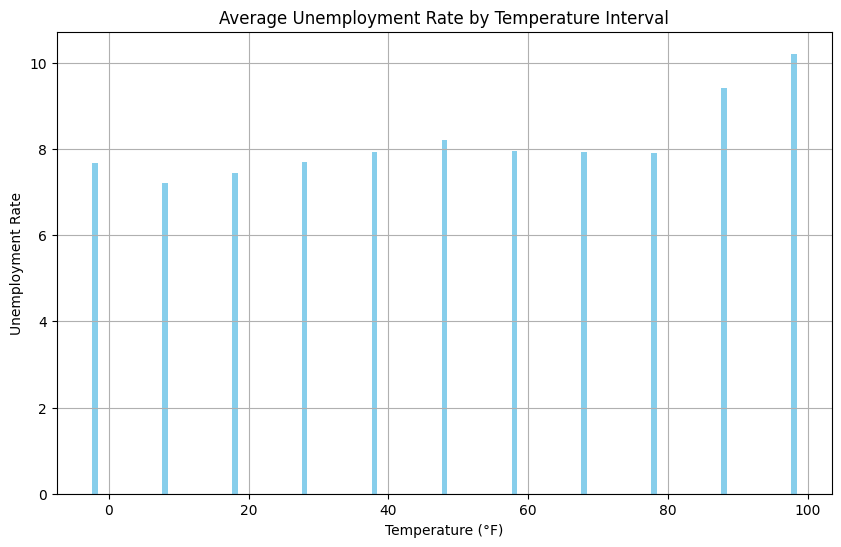

In [ ]:
avgUnemployment = []
for i in tempIntervals:
    unemployment = df1[(df1['Temperature'] >= i) & (df1['Temperature'] < i + 10)]['Unemployment'].mean()
    avgUnemployment.append(unemployment)
plt.figure(figsize=(10, 6))
plt.bar(tempIntervals, avgUnemployment, align='center', color='skyblue')
plt.title('Average Unemployment Rate by Temperature Interval')
plt.xlabel('Temperature (°F)')
plt.ylabel('Unemployment Rate')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

There appears to be no connection of unemployment and temperature. However, it's interesting to note the stark increase in unemployment when temperatures hit 90-100 degrees. Our team has speculation of the reason for this.

Average CPI vs. Temp

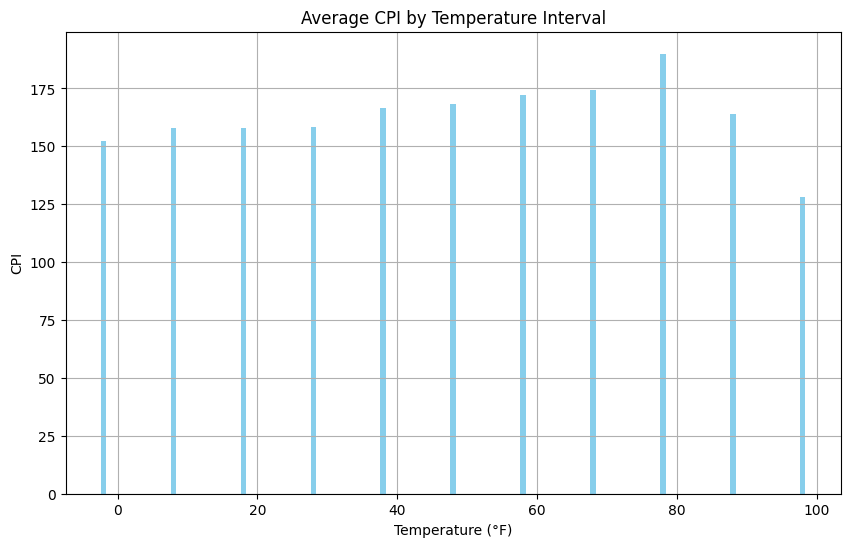

In [ ]:
avgCPI = []
for i in tempIntervals:
    cpi = df1[(df1['Temperature'] >= i) & (df1['Temperature'] < i + 10)]['CPI'].mean()
    avgCPI.append(cpi)
plt.figure(figsize=(10, 6))
plt.bar(tempIntervals, avgCPI, align='center', color='skyblue')
plt.title('Average CPI by Temperature Interval')
plt.xlabel('Temperature (°F)')
plt.ylabel('CPI')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

Through these comparisons of temperature, we find that temperature does not have any real correlation on average CPI, unemployment, or average fuel price. However, we can identify trends in temperature with weekly sales; namely speaking, the higher the temperature, the higher the weekly sales up until the temperature peaks at around 70 degrees, by which the sales start to decrease.

# Conclusions

Based on our analysis, we draw the following conclusions:

Seasons: Our data reveals distinct trends

*   Seasons: Our data reveals distinct trends
indicating that weekly sales surge during the winter months. This phenomenon is likely attributed to the heightened number of holidays during this period.
Temperatures: Similarly, our analysis uncovers

*  Temperatures: Similarly, our analysis uncovers trends suggesting a positive correlation between temperature and weekly sales. We observe a steady increase in sales as temperatures rise, peaking at approximately 70 degrees Fahrenheit, before showing a slight decline. This finding challenges previous assumptions linking temperature and seasons to weekly sales.

*   Unemployment: Despite initial hypotheses, our visualizations reveal no direct correlation between unemployment rates and weekly sales. However, we do identify correlations between unemployment and seasonal fluctuations, particularly during peak holiday periods such as Christmas and the 4th of July. The dips in unemployment during summer and winter may signify increased employment demand during these holiday seasons.


*   Holidays: Our analysis confirms significant correlations between holidays and weekly sales. Examining major holidays, we observe a surge in sales during the week leading up to the holiday, followed by a notable decline post-holiday.



Overall, our data analysis underscores the influence of seasons, holidays, and temperature on weekly sales. By identifying patterns and correlations within the data, particularly between seasons and temperature, as well as holidays and unemployment, we have gained valuable insights into consumer behavior and market trends at walmart stores.





